In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from climakitae.core.data_interface import (
    get_data,
)
from renewable_data_load import *


import dask
dask.config.set(scheduler='threads', num_workers=10)  # Adjust num_workers to your CPU cores

/Users/work/miniconda3/envs/renewables-analysis/lib/python3.12/site-packages/intake_esm/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


# largescale change in cf

In [2]:
resource = "pv"
module = "utility"
domain = "d02"
variable = "cf"
frequency = "day"

gwl_ref = 0.8
gwl_fut = 2.0

simulations = ["ec-earth3", "mpi-esm1-2-hr", "miroc6", "taiesm1"]
ref_vals = {}
deltas = {}
pct_deltas = {}
for simulation in simulations:
    cf = get_ren_data_concat(
        resource, module, domain, variable, frequency, simulation)

    WRF_sim_name = sim_name_dict[simulation]
    model = WRF_sim_name.split("_")[1]
    ensemble_member = WRF_sim_name.split("_")[2]

    start_year, end_year = get_gwl_crossing_period(model, ensemble_member, gwl_ref)
    print(start_year, end_year)
    cf_ref = cf.sel(time=slice(f"{start_year}", f"{end_year}"))

    start_year, end_year = get_gwl_crossing_period(model, ensemble_member, gwl_fut)
    print(start_year, end_year)
    cf_fut = cf.sel(time=slice(f"{start_year}", f"{end_year}"))

    delta_cf = (cf_fut.mean('time') - cf_ref.mean('time'))
    delta_cf_pct = (delta_cf / cf_ref.mean('time')) * 100.0
    ref_vals[simulation] = cf_ref.mean('time').compute()

    deltas[simulation] = delta_cf.compute()
    pct_deltas[simulation] = delta_cf_pct.compute()

1988 2017
2017 2046
1981 2010
2030 2059
1997 2026
2033 2062
1996 2025
2019 2048


In [3]:
# delete variables to free up memory
del cf
del cf_ref
del cf_fut
del delta_cf
del delta_cf_pct


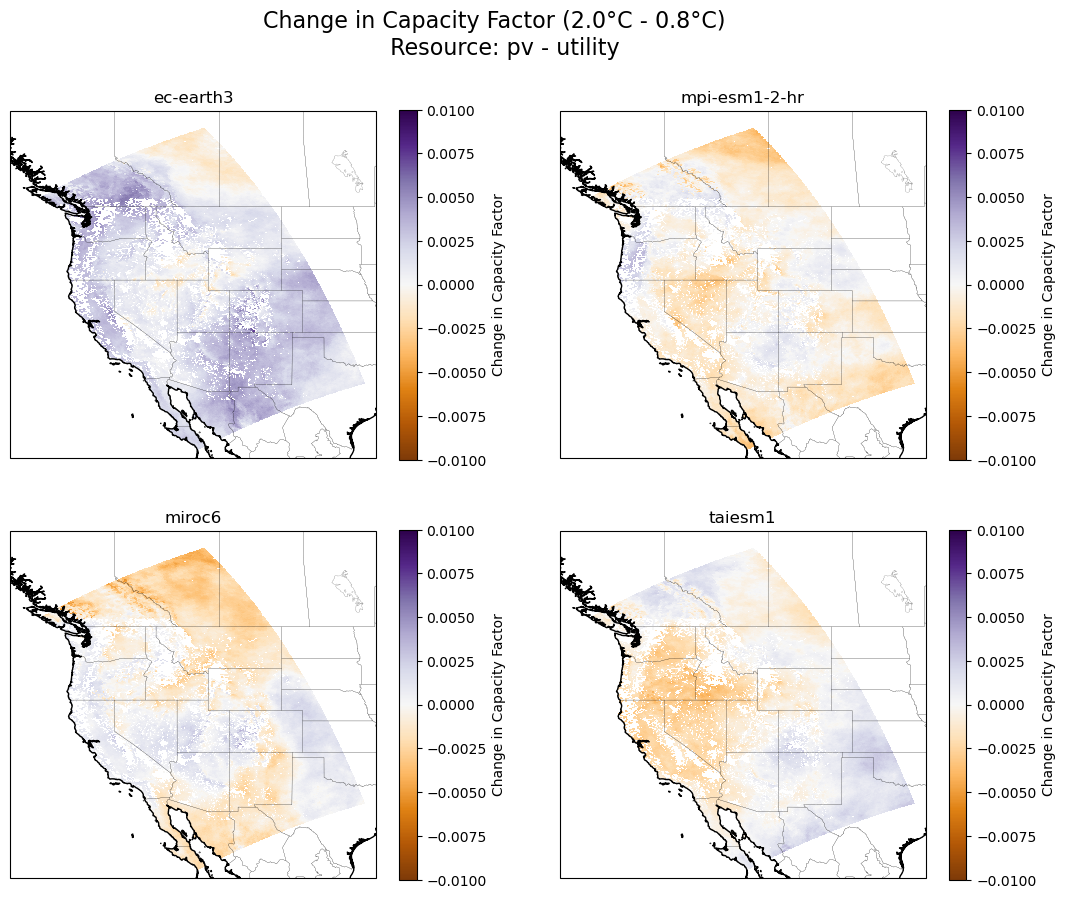

In [4]:
fig, axes = plt.subplots(
    2, 2, figsize=(13, 10), subplot_kw={"projection": ccrs.PlateCarree()}
)
for ax, simulation in zip(axes.flatten(), simulations, strict=False):
    deltas[simulation].plot(
        ax=ax,
        x="lon",
        y="lat",
        transform=ccrs.PlateCarree(),
        cbar_kwargs={"label": "Change in Capacity Factor"},
        cmap="PuOr",
        vmin=-0.01,
        vmax=0.01,
    )
    ax.set_title(simulation)
    ax.set_extent([-130, -95, 25, 57])
    ax.add_feature(cfeature.STATES.with_scale("10m"), edgecolor="black", linewidth=0.1)
    ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")
# set title
fig.suptitle(f"Change in Capacity Factor (2.0°C - 0.8°C) \n  Resource: {resource} - {module}", fontsize=16)
plt.savefig(f"figures/large_scale_cf_change_{resource}_{module}_{gwl_fut}C_minus_{gwl_ref}C.png", dpi=300, bbox_inches='tight')

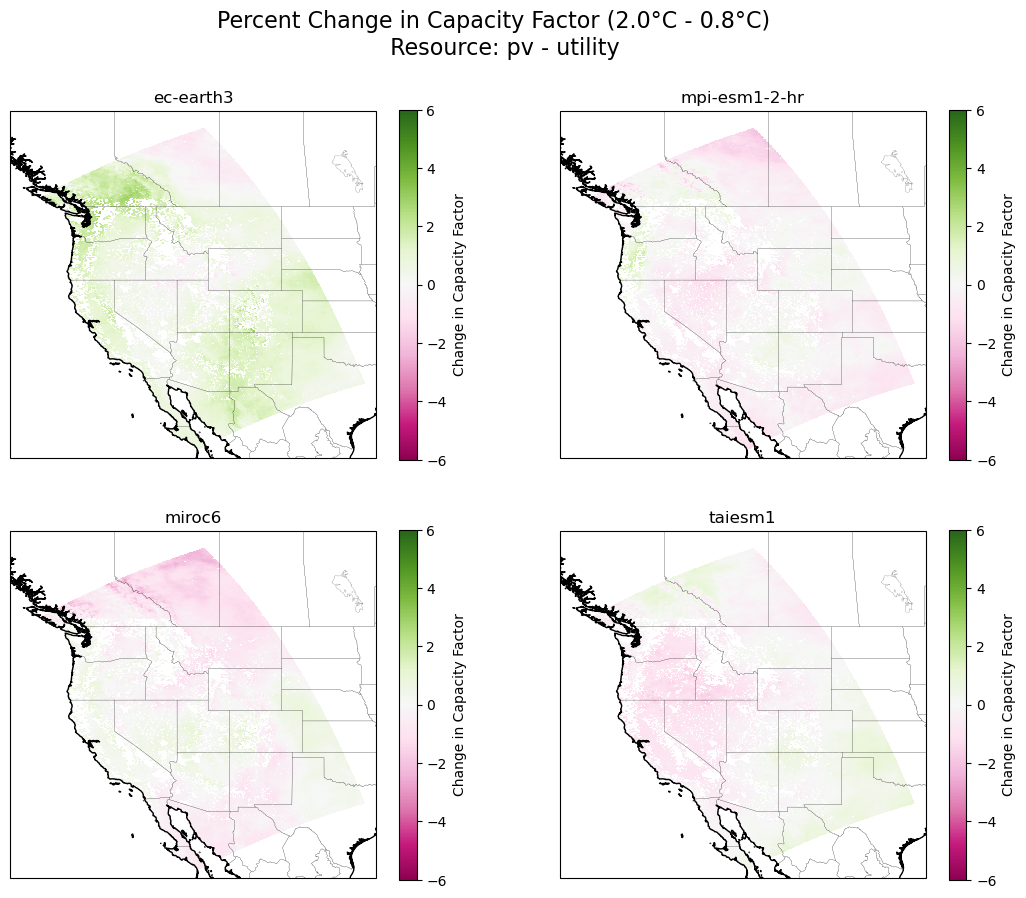

In [5]:

fig, axes = plt.subplots(
    2, 2, figsize=(13, 10), subplot_kw={"projection": ccrs.PlateCarree()}
)
for ax, simulation in zip(axes.flatten(), simulations, strict=False):
    pct_deltas[simulation].plot(
        ax=ax,
        x="lon",
        y="lat",
        transform=ccrs.PlateCarree(),
        cbar_kwargs={"label": "Change in Capacity Factor"},

        cmap="PiYG",
        vmin=-6,
        vmax=6,
    )
    ax.set_title(simulation)
    ax.set_extent([-130, -95, 25, 57])
    ax.add_feature(cfeature.STATES.with_scale("10m"), edgecolor="black", linewidth=0.1)
    ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")
# set title
fig.suptitle(f"Percent Change in Capacity Factor (2.0°C - 0.8°C) \n  Resource: {resource} - {module}", fontsize=16)
plt.savefig(f"figures/large_scale_cf_pct_change_{resource}_{module}_{gwl_fut}C_minus_{gwl_ref}C.png", dpi=300, bbox_inches='tight')

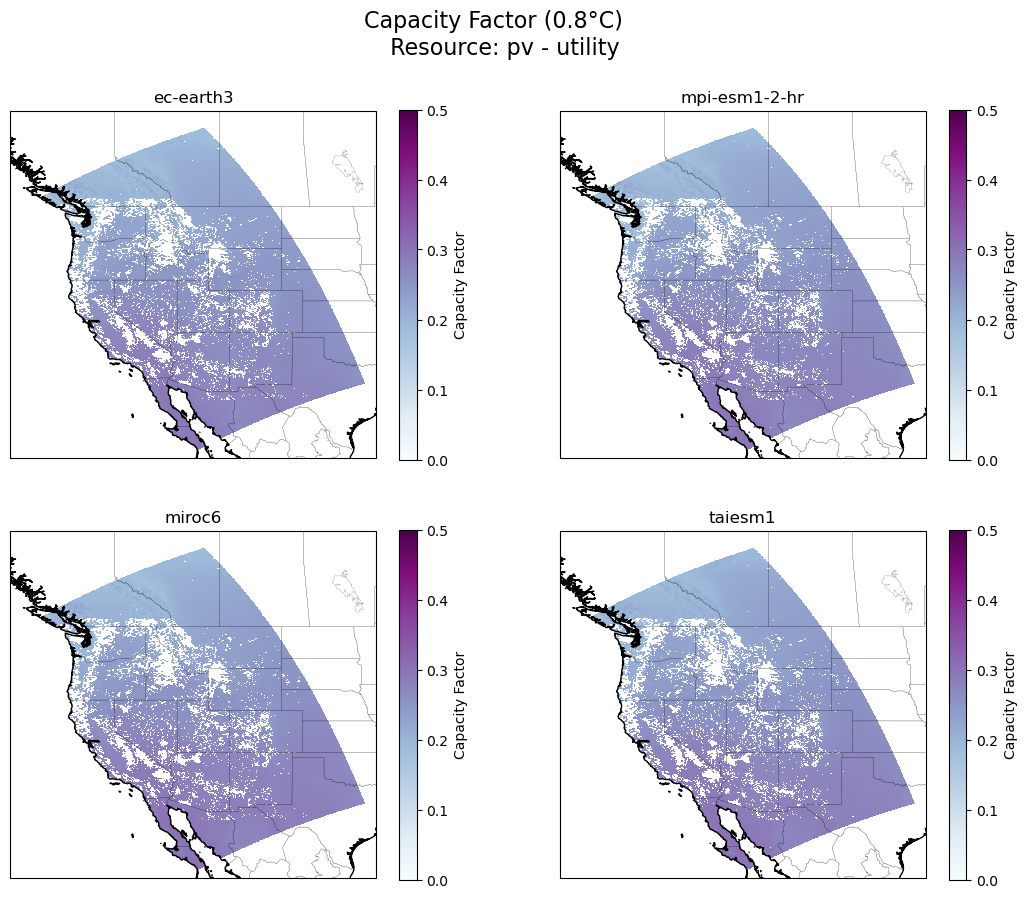

In [8]:
fig, axes = plt.subplots(
    2, 2, figsize=(13, 10), subplot_kw={"projection": ccrs.PlateCarree()}
)
for ax, simulation in zip(axes.flatten(), simulations, strict=False):
    ref_vals[simulation].plot(
        ax=ax,
        x="lon",
        y="lat",
        transform=ccrs.PlateCarree(),
    cbar_kwargs={"label": "Capacity Factor"},
    cmap="BuPu",
    vmin=0,
    vmax=0.5
    )
    ax.set_title(simulation)
    ax.set_extent([-130, -95, 25, 57])
    ax.add_feature(cfeature.STATES.with_scale("10m"), edgecolor="black", linewidth=0.1)
    ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")
# set title
fig.suptitle(f"Capacity Factor (0.8°C) \n  Resource: {resource} - {module}", fontsize=16)
plt.savefig(f"figures/large_scale_cf_reference_{resource}_{module}_08C.png", dpi=300, bbox_inches='tight')

In [9]:
resource = "windpower"
module = "onshore"
domain = "d02"
variable = "cf"
frequency = "day"

gwl_ref = 0.8
gwl_fut = 2.0

simulations = ["ec-earth3", "mpi-esm1-2-hr", "miroc6", "taiesm1"]
ref_vals = {}
deltas = {}
pct_deltas = {}
for simulation in simulations:
    cf = get_ren_data_concat(
        resource, module, domain, variable, frequency, simulation)

    WRF_sim_name = sim_name_dict[simulation]
    model = WRF_sim_name.split("_")[1]
    ensemble_member = WRF_sim_name.split("_")[2]

    start_year, end_year = get_gwl_crossing_period(model, ensemble_member, gwl_ref)
    print(start_year, end_year)
    cf_ref = cf.sel(time=slice(f"{start_year}", f"{end_year}"))

    start_year, end_year = get_gwl_crossing_period(model, ensemble_member, gwl_fut)
    print(start_year, end_year)
    cf_fut = cf.sel(time=slice(f"{start_year}", f"{end_year}"))

    delta_cf = (cf_fut.mean('time') - cf_ref.mean('time'))
    delta_cf_pct = (delta_cf / cf_ref.mean('time')) * 100.0
    ref_vals[simulation] = cf_ref.mean('time').compute()

    deltas[simulation] = delta_cf.compute()
    pct_deltas[simulation] = delta_cf_pct.compute()

1988 2017
2017 2046
1981 2010
2030 2059
1997 2026
2033 2062
1996 2025
2019 2048


In [10]:
# delete variables to free up memory
del cf
del cf_ref
del cf_fut
del delta_cf
del delta_cf_pct


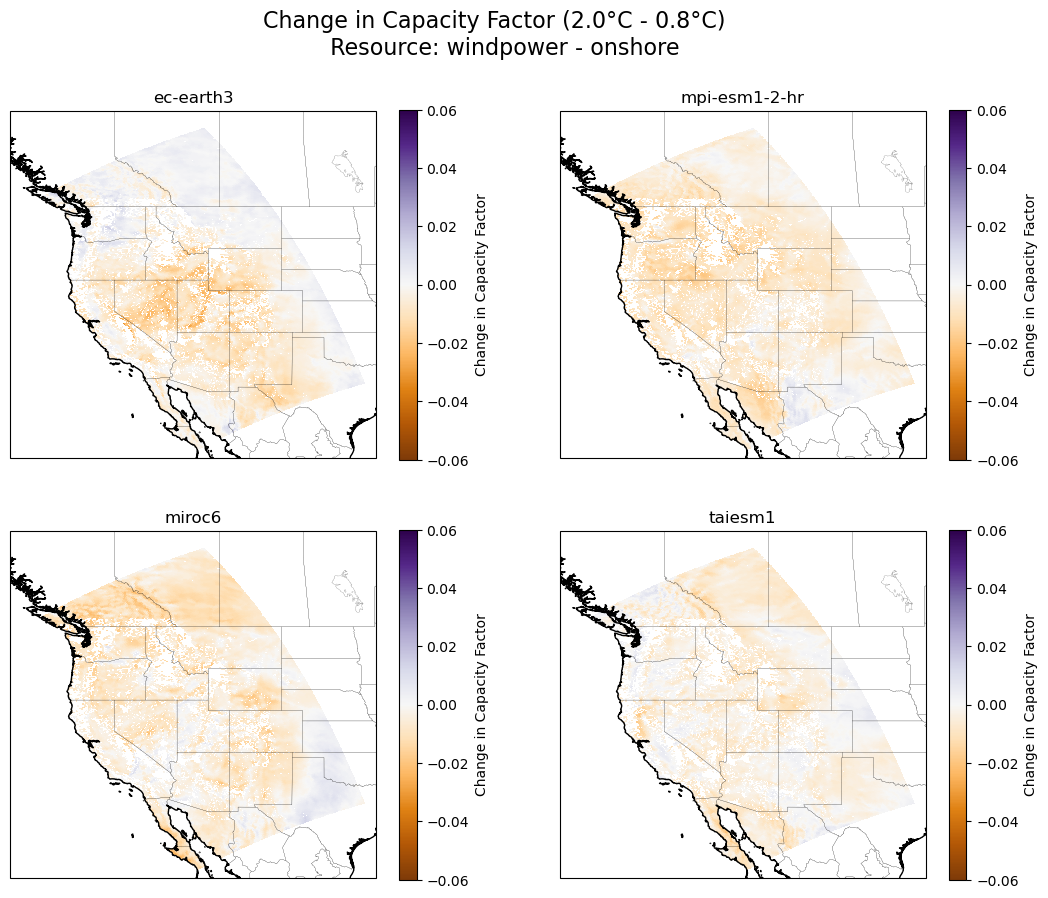

In [11]:
fig, axes = plt.subplots(
    2, 2, figsize=(13, 10), subplot_kw={"projection": ccrs.PlateCarree()}
)
for ax, simulation in zip(axes.flatten(), simulations, strict=False):
    deltas[simulation].plot(
        ax=ax,
        x="lon",
        y="lat",
        transform=ccrs.PlateCarree(),
        cbar_kwargs={"label": "Change in Capacity Factor"},
        cmap="PuOr",
        vmin=-0.06,
        vmax=0.06,
    )
    ax.set_title(simulation)
    ax.set_extent([-130, -95, 25, 57])
    ax.add_feature(cfeature.STATES.with_scale("10m"), edgecolor="black", linewidth=0.1)
    ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")
# set title
fig.suptitle(f"Change in Capacity Factor (2.0°C - 0.8°C) \n  Resource: {resource} - {module}", fontsize=16)
plt.savefig(f"figures/large_scale_cf_change_{resource}_{module}_{gwl_fut}C_minus_{gwl_ref}C.png", dpi=300, bbox_inches='tight')

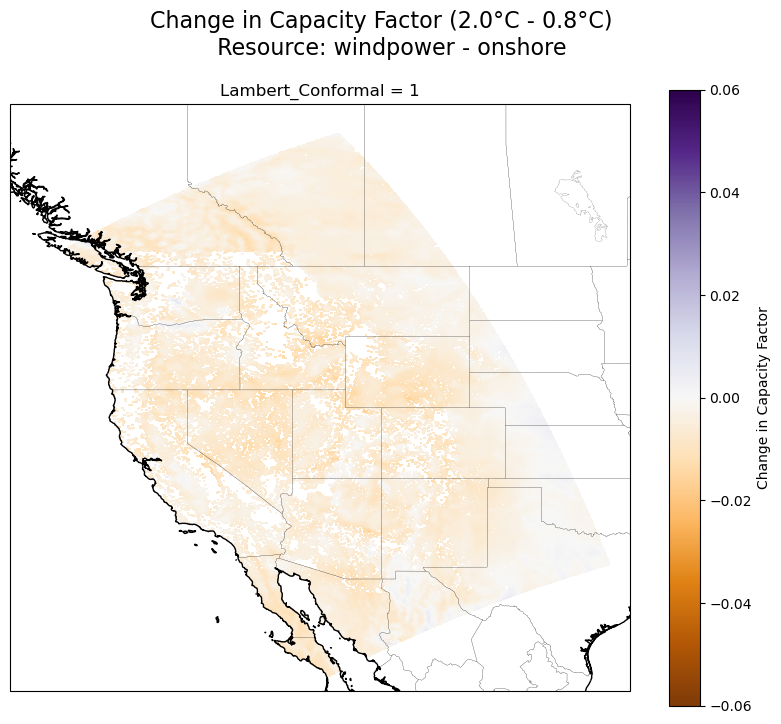

In [12]:
# take the mean across simulations
mean_delta = sum(deltas.values()) / len(deltas)

fig = plt.figure(figsize=(10, 8),)  # open matplotlib figure
ax = plt.axes(projection=ccrs.PlateCarree())
mean_delta.plot(
    ax=ax,
    x="lon",
    y="lat",
    transform=ccrs.PlateCarree(),
    cbar_kwargs={"label": "Change in Capacity Factor"},
        cmap="PuOr",
        vmin=-0.06,
        vmax=0.06,)

ax.set_extent([-130, -95, 25, 57])

ax.add_feature(cfeature.STATES.with_scale("10m"), edgecolor="black", linewidth=0.1)
ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")

fig.suptitle(f"Change in Capacity Factor (2.0°C - 0.8°C) \n  Resource: {resource} - {module}", fontsize=16)
plt.savefig(f"figures/large_scale_cf_change_mean_{resource}_{module}_{gwl_fut}C_minus_{gwl_ref}C.png", dpi=300, bbox_inches='tight')

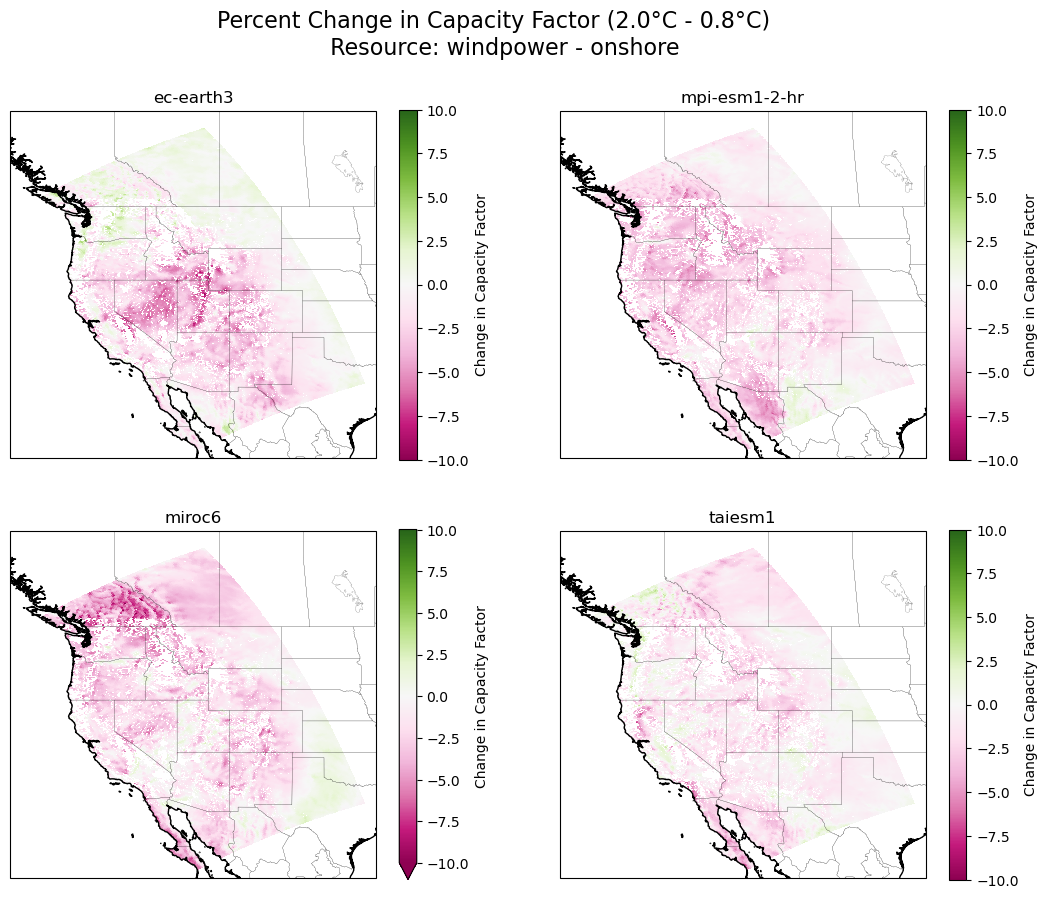

In [13]:

fig, axes = plt.subplots(
    2, 2, figsize=(13, 10), subplot_kw={"projection": ccrs.PlateCarree()}
)
for ax, simulation in zip(axes.flatten(), simulations, strict=False):
    pct_deltas[simulation].plot(
        ax=ax,
        x="lon",
        y="lat",
        transform=ccrs.PlateCarree(),
        cbar_kwargs={"label": "Change in Capacity Factor"},

        cmap="PiYG",
        vmin=-10,
        vmax=10,
    )
    ax.set_title(simulation)
    ax.set_extent([-130, -95, 25, 57])
    ax.add_feature(cfeature.STATES.with_scale("10m"), edgecolor="black", linewidth=0.1)
    ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")
# set title
fig.suptitle(f"Percent Change in Capacity Factor (2.0°C - 0.8°C) \n  Resource: {resource} - {module}", fontsize=16)
plt.savefig(f"figures/large_scale_cf_pct_change_{resource}_{module}_{gwl_fut}C_minus_{gwl_ref}C.png", dpi=300, bbox_inches='tight')

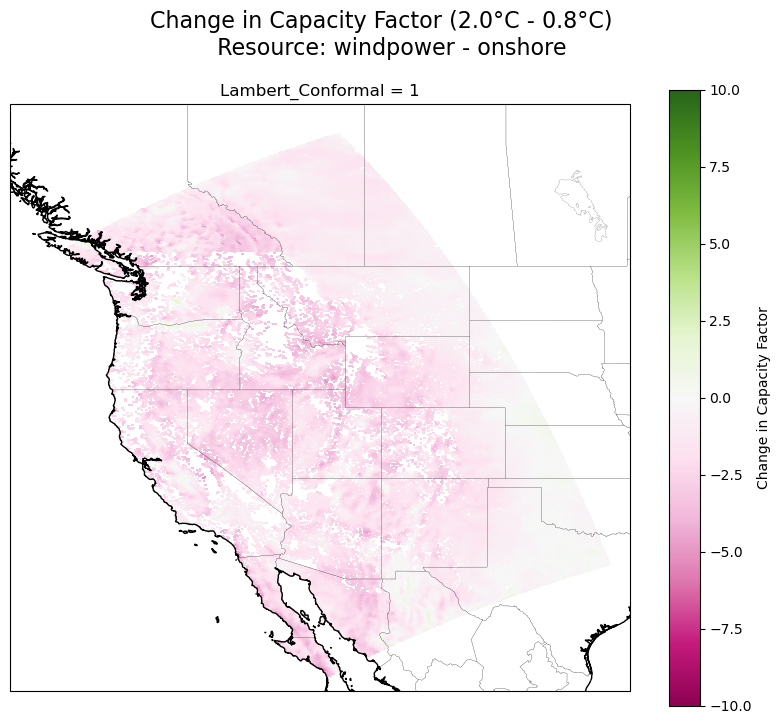

In [14]:
# take the mean across simulations
mean_delta = sum(pct_deltas.values()) / len(pct_deltas)

fig = plt.figure(figsize=(10, 8))  # open matplotlib figure
ax = plt.axes(projection=ccrs.PlateCarree())
mean_delta.plot(
    ax=ax,
    x="lon",
    y="lat",
    transform=ccrs.PlateCarree(),
    cbar_kwargs={"label": "Change in Capacity Factor"},
        cmap="PiYG",
        vmin=-10,
        vmax=10,)

ax.set_extent([-130, -95, 25, 57])

ax.add_feature(cfeature.STATES.with_scale("10m"), edgecolor="black", linewidth=0.1)
ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")

fig.suptitle(f"Change in Capacity Factor (2.0°C - 0.8°C) \n  Resource: {resource} - {module}", fontsize=16)
plt.savefig(f"figures/large_scale_cf_pct_change_mean_{resource}_{module}_{gwl_fut}C_minus_{gwl_ref}C.png", dpi=300, bbox_inches='tight')

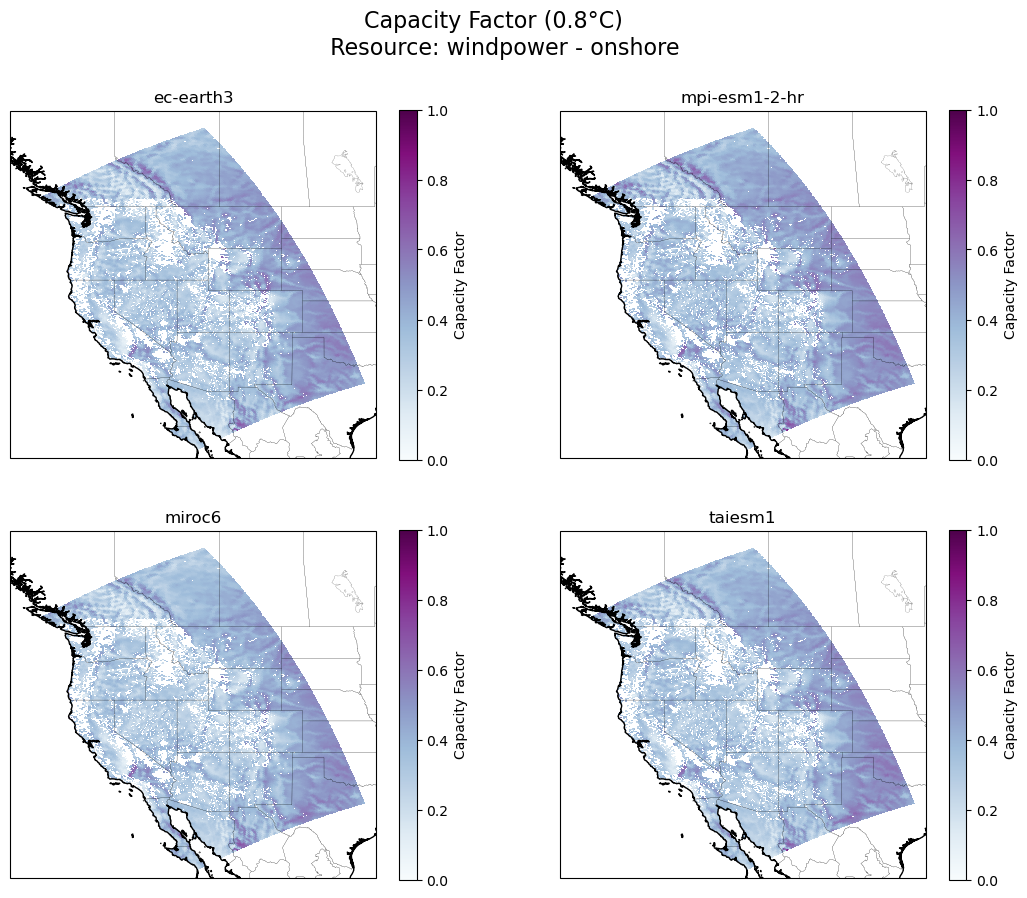

In [15]:
fig, axes = plt.subplots(
    2, 2, figsize=(13, 10), subplot_kw={"projection": ccrs.PlateCarree()}
)
for ax, simulation in zip(axes.flatten(), simulations, strict=False):
    ref_vals[simulation].plot(
        ax=ax,
        x="lon",
        y="lat",
        transform=ccrs.PlateCarree(),
    cbar_kwargs={"label": "Capacity Factor"},
    cmap="BuPu",
    vmin=0,
    vmax=1
    )
    ax.set_title(simulation)
    ax.set_extent([-130, -95, 25, 57])
    ax.add_feature(cfeature.STATES.with_scale("10m"), edgecolor="black", linewidth=0.1)
    ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")
# set title
fig.suptitle(f"Capacity Factor (0.8°C) \n  Resource: {resource} - {module}", fontsize=16)
plt.savefig(f"figures/large_scale_cf_reference_{resource}_{module}_{gwl_ref}C.png", dpi=300, bbox_inches='tight')

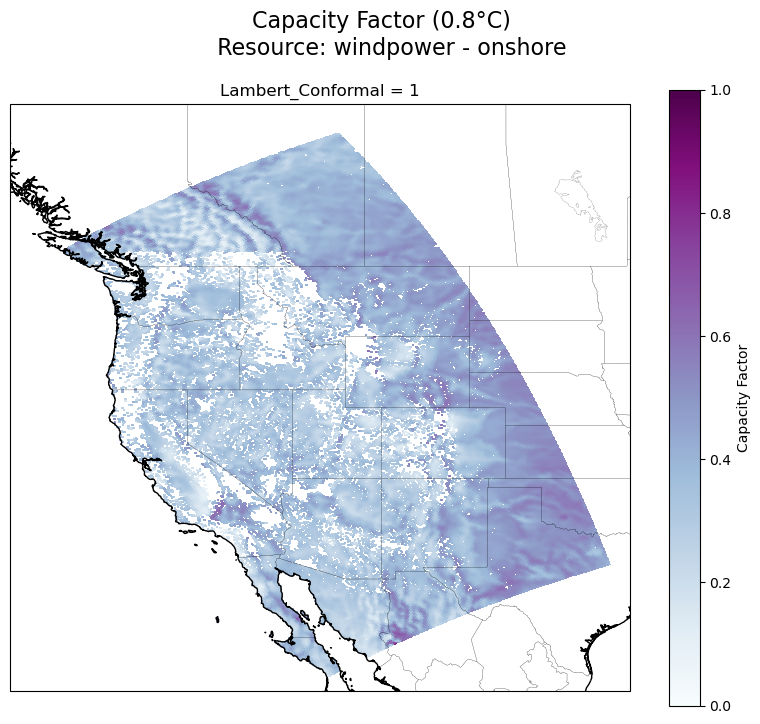

In [16]:
mean_ref = sum(ref_vals.values()) / len(ref_vals)


# take the mean across simulations
mean_delta = sum(pct_deltas.values()) / len(pct_deltas)

fig = plt.figure(figsize=(10, 8))  # open matplotlib figure
ax = plt.axes(projection=ccrs.PlateCarree())
mean_ref.plot(
    ax=ax,
    x="lon",
    y="lat",
    transform=ccrs.PlateCarree(),
    cbar_kwargs={"label": "Capacity Factor"},
    cmap="BuPu",
    vmin=0,
    vmax=1
    )

ax.set_extent([-130, -95, 25, 57])

ax.add_feature(cfeature.STATES.with_scale("10m"), edgecolor="black", linewidth=0.1)
ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")

fig.suptitle(f"Capacity Factor (0.8°C) \n  Resource: {resource} - {module}", fontsize=16)
plt.savefig(f"figures/large_scale_cf_{resource}_{module}_{gwl_ref}C.png", dpi=300, bbox_inches='tight')

## Seasonal breakdown - Windpower onshore

In [ ]:
seasons = ['DJF', 'MAM', 'JJA', 'SON']
season_ref_vals = {season: {} for season in seasons}
season_deltas = {season: {} for season in seasons}
season_pct_deltas = {season: {} for season in seasons}

for simulation in simulations:
    cf = get_ren_data_concat(
        resource, module, domain, variable, frequency, simulation
    )

    WRF_sim_name = sim_name_dict[simulation]
    model = WRF_sim_name.split("_")[1]
    ensemble_member = WRF_sim_name.split("_")[2]

    start_year, end_year = get_gwl_crossing_period(model, ensemble_member, gwl_ref)
    cf_ref = cf.sel(time=slice(f"{start_year}", f"{end_year}"))
    cf_ref_seasonal = cf_ref.groupby('time.season')

    start_year, end_year = get_gwl_crossing_period(model, ensemble_member, gwl_fut)
    cf_fut = cf.sel(time=slice(f"{start_year}", f"{end_year}"))
    cf_fut_seasonal = cf_fut.groupby('time.season')

    for season in seasons:
        ref_mean = cf_ref_seasonal[season].mean('time')
        fut_mean = cf_fut_seasonal[season].mean('time')
        
        delta = fut_mean - ref_mean
        delta_pct = (delta / ref_mean) * 100.0
        
        season_ref_vals[season][simulation] = ref_mean.compute()
        season_deltas[season][simulation] = delta.compute()
        season_pct_deltas[season][simulation] = delta_pct.compute()

    del cf
    del cf_ref
    del cf_fut
    del cf_ref_seasonal
    del cf_fut_seasonal

### Plot seasonal changes - Windpower onshore

In [ ]:
# Plot absolute change for each season
for season in seasons:
    fig, axes = plt.subplots(
        2, 2, figsize=(13, 10), subplot_kw={"projection": ccrs.PlateCarree()}
    )
    
    for ax, simulation in zip(axes.flatten(), simulations):
        season_deltas[season][simulation].plot(
            ax=ax,
            x="lon",
            y="lat",
            transform=ccrs.PlateCarree(),
            cbar_kwargs={"label": "Change in Capacity Factor"},
            cmap="PuOr",
            vmin=-0.06,
            vmax=0.06,
        )
        ax.set_title(simulation)
        ax.set_extent([-130, -95, 25, 57])
        ax.add_feature(cfeature.STATES.with_scale("10m"), edgecolor="black", linewidth=0.1)
        ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")
    
    fig.suptitle(f"Change in Capacity Factor - {season} ({gwl_fut}°C - {gwl_ref}°C)\nResource: {resource} - {module}", 
                 fontsize=16)
    plt.tight_layout()
    plt.savefig(f"figures/seasonal_cf_change_{season}_{resource}_{module}_{gwl_fut}C_minus_{gwl_ref}C.png", 
                dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
# Plot percent change for each season
for season in seasons:
    fig, axes = plt.subplots(
        2, 2, figsize=(13, 10), subplot_kw={"projection": ccrs.PlateCarree()}
    )
    
    for ax, simulation in zip(axes.flatten(), simulations):
        season_pct_deltas[season][simulation].plot(
            ax=ax,
            x="lon",
            y="lat",
            transform=ccrs.PlateCarree(),
            cbar_kwargs={"label": "Percent Change (%)"},
            cmap="PiYG",
            vmin=-10,
            vmax=10,
        )
        ax.set_title(simulation)
        ax.set_extent([-130, -95, 25, 57])
        ax.add_feature(cfeature.STATES.with_scale("10m"), edgecolor="black", linewidth=0.1)
        ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")
    
    fig.suptitle(f"Percent Change in Capacity Factor - {season} ({gwl_fut}°C - {gwl_ref}°C)\nResource: {resource} - {module}", 
                 fontsize=16)
    plt.tight_layout()
    plt.savefig(f"figures/seasonal_cf_pct_change_{season}_{resource}_{module}_{gwl_fut}C_minus_{gwl_ref}C.png", 
                dpi=300, bbox_inches='tight')
    plt.show()

## Windpower -- offshore

In [18]:
resource = "windpower"
module = "offshore"
domain = "d03"
variable = "cf"
frequency = "day"

gwl_ref = 0.8
gwl_fut = 2.0

simulations = ["ec-earth3", "mpi-esm1-2-hr", "miroc6", "taiesm1"]
ref_vals = {}
deltas = {}
pct_deltas = {}
for simulation in simulations:
    cf = get_ren_data_concat(
        resource, module, domain, variable, frequency, simulation)

    WRF_sim_name = sim_name_dict[simulation]
    model = WRF_sim_name.split("_")[1]
    ensemble_member = WRF_sim_name.split("_")[2]

    start_year, end_year = get_gwl_crossing_period(model, ensemble_member, gwl_ref)
    print(start_year, end_year)
    cf_ref = cf.sel(time=slice(f"{start_year}", f"{end_year}"))

    start_year, end_year = get_gwl_crossing_period(model, ensemble_member, gwl_fut)
    print(start_year, end_year)
    cf_fut = cf.sel(time=slice(f"{start_year}", f"{end_year}"))

    delta_cf = (cf_fut.mean('time') - cf_ref.mean('time'))
    delta_cf_pct = (delta_cf / cf_ref.mean('time')) * 100.0
    ref_vals[simulation] = cf_ref.mean('time').compute()

    deltas[simulation] = delta_cf.compute()
    pct_deltas[simulation] = delta_cf_pct.compute()

1988 2017
2017 2046
1981 2010
2030 2059
1997 2026
2033 2062
1996 2025
2019 2048


In [19]:
# delete variables to free up memory
del cf
del cf_ref
del cf_fut
del delta_cf
del delta_cf_pct


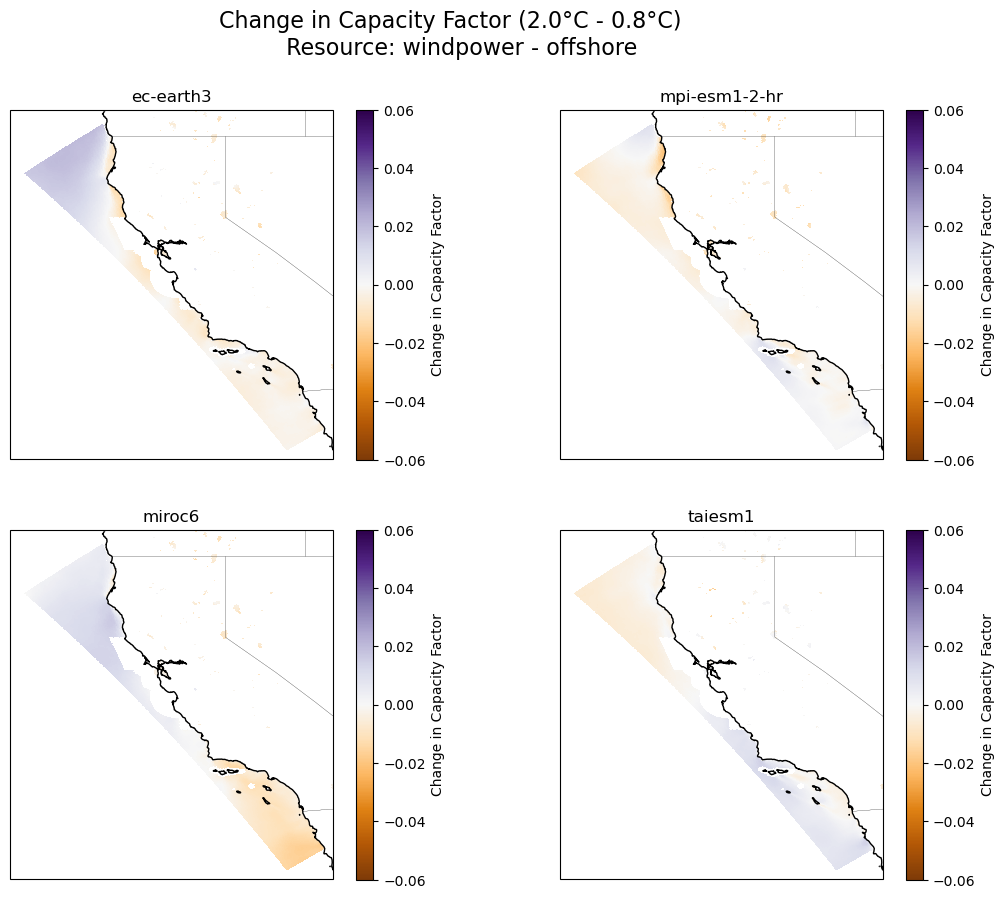

In [26]:
fig, axes = plt.subplots(
    2, 2, figsize=(13, 10), subplot_kw={"projection": ccrs.PlateCarree()}
)
for ax, simulation in zip(axes.flatten(), simulations, strict=False):
    deltas[simulation].plot(
        ax=ax,
        x="lon",
        y="lat",
        transform=ccrs.PlateCarree(),
        cbar_kwargs={"label": "Change in Capacity Factor"},
        cmap="PuOr",
        vmin=-0.06,
        vmax=0.06,
    )
    ax.set_title(simulation)
    ax.set_extent([-128, -116, 30, 43])
    ax.add_feature(cfeature.STATES.with_scale("10m"), edgecolor="black", linewidth=0.1)
    ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")
# set title
fig.suptitle(f"Change in Capacity Factor (2.0°C - 0.8°C) \n  Resource: {resource} - {module}", fontsize=16)
plt.savefig(f"figures/large_scale_cf_change_{resource}_{module}_{gwl_fut}C_minus_{gwl_ref}C.png", dpi=300, bbox_inches='tight')

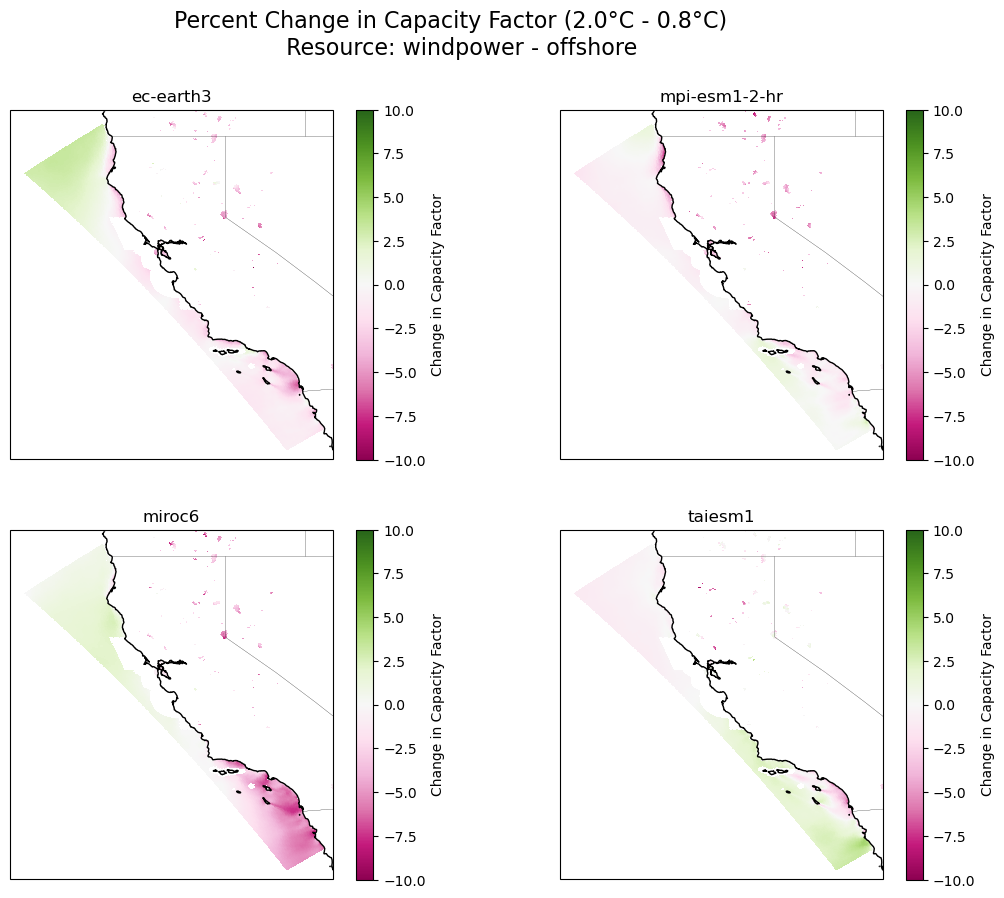

In [27]:

fig, axes = plt.subplots(
    2, 2, figsize=(13, 10), subplot_kw={"projection": ccrs.PlateCarree()}
)
for ax, simulation in zip(axes.flatten(), simulations, strict=False):
    pct_deltas[simulation].plot(
        ax=ax,
        x="lon",
        y="lat",
        transform=ccrs.PlateCarree(),
        cbar_kwargs={"label": "Change in Capacity Factor"},

        cmap="PiYG",
        vmin=-10,
        vmax=10,
    )
    ax.set_title(simulation)
    ax.set_extent([-128, -116, 30, 43])
    ax.add_feature(cfeature.STATES.with_scale("10m"), edgecolor="black", linewidth=0.1)
    ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")
# set title
fig.suptitle(f"Percent Change in Capacity Factor (2.0°C - 0.8°C) \n  Resource: {resource} - {module}", fontsize=16)
plt.savefig(f"figures/large_scale_cf_pct_change_{resource}_{module}_{gwl_fut}C_minus_{gwl_ref}C.png", dpi=300, bbox_inches='tight')

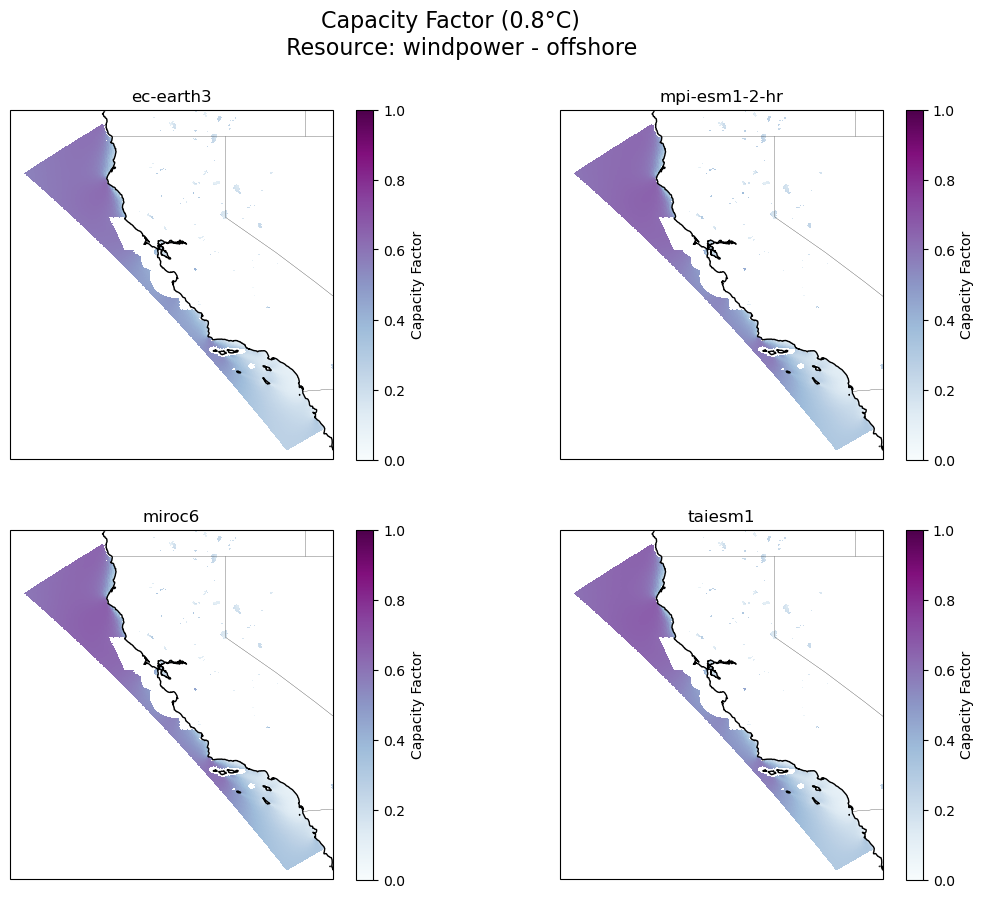

In [28]:
fig, axes = plt.subplots(
    2, 2, figsize=(13, 10), subplot_kw={"projection": ccrs.PlateCarree()}
)
for ax, simulation in zip(axes.flatten(), simulations, strict=False):
    ref_vals[simulation].plot(
        ax=ax,
        x="lon",
        y="lat",
        transform=ccrs.PlateCarree(),
    cbar_kwargs={"label": "Capacity Factor"},
    cmap="BuPu",
    vmin=0,
    vmax=1
    )
    ax.set_title(simulation)
    ax.set_extent([-128, -116, 30, 43])
    ax.add_feature(cfeature.STATES.with_scale("10m"), edgecolor="black", linewidth=0.1)
    ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")
# set title
fig.suptitle(f"Capacity Factor (0.8°C) \n  Resource: {resource} - {module}", fontsize=16)
plt.savefig(f"figures/large_scale_cf_reference_{resource}_{module}_{gwl_ref}C.png", dpi=300, bbox_inches='tight')

## Seasonal breakdown - Windpower offshore

In [ ]:
seasons = ['DJF', 'MAM', 'JJA', 'SON']
season_ref_vals = {season: {} for season in seasons}
season_deltas = {season: {} for season in seasons}
season_pct_deltas = {season: {} for season in seasons}

for simulation in simulations:
    cf = get_ren_data_concat(
        resource, module, domain, variable, frequency, simulation
    )

    WRF_sim_name = sim_name_dict[simulation]
    model = WRF_sim_name.split("_")[1]
    ensemble_member = WRF_sim_name.split("_")[2]

    start_year, end_year = get_gwl_crossing_period(model, ensemble_member, gwl_ref)
    cf_ref = cf.sel(time=slice(f"{start_year}", f"{end_year}"))
    cf_ref_seasonal = cf_ref.groupby('time.season')

    start_year, end_year = get_gwl_crossing_period(model, ensemble_member, gwl_fut)
    cf_fut = cf.sel(time=slice(f"{start_year}", f"{end_year}"))
    cf_fut_seasonal = cf_fut.groupby('time.season')

    for season in seasons:
        ref_mean = cf_ref_seasonal[season].mean('time')
        fut_mean = cf_fut_seasonal[season].mean('time')
        
        delta = fut_mean - ref_mean
        delta_pct = (delta / ref_mean) * 100.0
        
        season_ref_vals[season][simulation] = ref_mean.compute()
        season_deltas[season][simulation] = delta.compute()
        season_pct_deltas[season][simulation] = delta_pct.compute()

    del cf
    del cf_ref
    del cf_fut
    del cf_ref_seasonal
    del cf_fut_seasonal

### Plot seasonal changes - Windpower offshore

In [ ]:
# Plot absolute change for each season (note: offshore uses d03 extent)
for season in seasons:
    fig, axes = plt.subplots(
        2, 2, figsize=(13, 10), subplot_kw={"projection": ccrs.PlateCarree()}
    )
    
    for ax, simulation in zip(axes.flatten(), simulations):
        season_deltas[season][simulation].plot(
            ax=ax,
            x="lon",
            y="lat",
            transform=ccrs.PlateCarree(),
            cbar_kwargs={"label": "Change in Capacity Factor"},
            cmap="PuOr",
            vmin=-0.06,
            vmax=0.06,
        )
        ax.set_title(simulation)
        ax.set_extent([-128, -116, 30, 43])  # d03 offshore domain
        ax.add_feature(cfeature.STATES.with_scale("10m"), edgecolor="black", linewidth=0.1)
        ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")
    
    fig.suptitle(f"Change in Capacity Factor - {season} ({gwl_fut}°C - {gwl_ref}°C)\nResource: {resource} - {module}", 
                 fontsize=16)
    plt.tight_layout()
    plt.savefig(f"figures/seasonal_cf_change_{season}_{resource}_{module}_{gwl_fut}C_minus_{gwl_ref}C.png", 
                dpi=300, bbox_inches='tight')
    plt.show()

In [ ]:
# Plot percent change for each season
for season in seasons:
    fig, axes = plt.subplots(
        2, 2, figsize=(13, 10), subplot_kw={"projection": ccrs.PlateCarree()}
    )
    
    for ax, simulation in zip(axes.flatten(), simulations):
        season_pct_deltas[season][simulation].plot(
            ax=ax,
            x="lon",
            y="lat",
            transform=ccrs.PlateCarree(),
            cbar_kwargs={"label": "Percent Change (%)"},
            cmap="PiYG",
            vmin=-10,
            vmax=10,
        )
        ax.set_title(simulation)
        ax.set_extent([-128, -116, 30, 43])  # d03 offshore domain
        ax.add_feature(cfeature.STATES.with_scale("10m"), edgecolor="black", linewidth=0.1)
        ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")
    
    fig.suptitle(f"Percent Change in Capacity Factor - {season} ({gwl_fut}°C - {gwl_ref}°C)\nResource: {resource} - {module}", 
                 fontsize=16)
    plt.tight_layout()
    plt.savefig(f"figures/seasonal_cf_pct_change_{season}_{resource}_{module}_{gwl_fut}C_minus_{gwl_ref}C.png", 
                dpi=300, bbox_inches='tight')
    plt.show()

## Seasonal breakdown

In [4]:
resource = "pv"
module = "utility"
domain = "d02"
variable = "cf"
frequency = "day"

gwl_ref = 0.8
gwl_fut = 2.0

simulations = ["ec-earth3", "mpi-esm1-2-hr", "miroc6", "taiesm1"]


In [5]:
# Group by season and calculate seasonal changes
seasons = ['DJF', 'MAM', 'JJA', 'SON']

season_deltas = {season: {} for season in seasons}
season_pct_deltas = {season: {} for season in seasons}

for simulation in simulations:
    cf = get_ren_data_concat(
        resource, module, domain, variable, frequency, simulation)

    WRF_sim_name = sim_name_dict[simulation]
    model = WRF_sim_name.split("_")[1]
    ensemble_member = WRF_sim_name.split("_")[2]

    # Reference period
    start_year, end_year = get_gwl_crossing_period(model, ensemble_member, gwl_ref)
    print(f"{simulation} reference: {start_year}-{end_year}")
    cf_ref = cf.sel(time=slice(f"{start_year}", f"{end_year}"))

    # Future period
    start_year, end_year = get_gwl_crossing_period(model, ensemble_member, gwl_fut)
    print(f"{simulation} future: {start_year}-{end_year}")
    cf_fut = cf.sel(time=slice(f"{start_year}", f"{end_year}"))

    # Group by season using month
    cf_ref_seasonal = cf_ref.groupby('time.season')
    cf_fut_seasonal = cf_fut.groupby('time.season')
    
    # Calculate seasonal means and changes
    for season in seasons:
        print(f"Calculating {season} for {simulation}")
        ref_mean = cf_ref_seasonal[season].mean('time')
        fut_mean = cf_fut_seasonal[season].mean('time')
        
        delta = fut_mean - ref_mean
        delta_pct = (delta / ref_mean) * 100.0
        
        season_deltas[season][simulation] = delta.compute()
        season_pct_deltas[season][simulation] = delta_pct.compute()
    
    # Clean up
    del cf, cf_ref, cf_fut, cf_ref_seasonal, cf_fut_seasonal

print("\nSeasonal data calculated for all simulations")

ec-earth3 reference: 1988-2017
ec-earth3 future: 2017-2046
Calculating DJF for ec-earth3
Calculating MAM for ec-earth3
Calculating MAM for ec-earth3
Calculating JJA for ec-earth3
Calculating JJA for ec-earth3
Calculating SON for ec-earth3
Calculating SON for ec-earth3
mpi-esm1-2-hr reference: 1981-2010
mpi-esm1-2-hr future: 2030-2059
Calculating DJF for mpi-esm1-2-hr
mpi-esm1-2-hr reference: 1981-2010
mpi-esm1-2-hr future: 2030-2059
Calculating DJF for mpi-esm1-2-hr
Calculating MAM for mpi-esm1-2-hr
Calculating MAM for mpi-esm1-2-hr
Calculating JJA for mpi-esm1-2-hr
Calculating JJA for mpi-esm1-2-hr
Calculating SON for mpi-esm1-2-hr
Calculating SON for mpi-esm1-2-hr


KeyboardInterrupt: 

### Plot seasonal changes in capacity factor

In [ ]:
# Plot absolute change: 4x4 grid (models as rows, seasons as columns)
fig, axes = plt.subplots(
    4, 4, figsize=(20, 16), subplot_kw={"projection": ccrs.PlateCarree()}
)

for i, simulation in enumerate(simulations):
    for j, season in enumerate(seasons):
        ax = axes[i, j]
        season_deltas[season][simulation].plot(
            ax=ax,
            x="lon",
            y="lat",
            transform=ccrs.PlateCarree(),
            cbar_kwargs={"label": "Change in CF", "shrink": 0.8},
            cmap="PuOr",
            vmin=-0.01,
            vmax=0.01,
        )
        
        # Add title for top row (season names)
        if i == 0:
            ax.set_title(f"{season}\n{simulation}", fontsize=12)
        else:
            ax.set_title(simulation, fontsize=10)
        
        ax.set_extent([-130, -95, 25, 57])
        ax.add_feature(cfeature.STATES.with_scale("10m"), edgecolor="black", linewidth=0.1)
        ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")

fig.suptitle(f"Seasonal Change in Capacity Factor ({gwl_fut}°C - {gwl_ref}°C)\nResource: {resource} - {module}", 
             fontsize=16, y=0.995)
plt.tight_layout()
plt.savefig(f"figures/seasonal_cf_change_4x4_{resource}_{module}_{gwl_fut}C_minus_{gwl_ref}C.png", 
            dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Plot percent change for each season
for season in seasons:
    fig, axes = plt.subplots(
        2, 2, figsize=(13, 10), subplot_kw={"projection": ccrs.PlateCarree()}
    )
    
    for ax, simulation in zip(axes.flatten(), simulations):
        season_pct_deltas[season][simulation].plot(
            ax=ax,
            x="lon",
            y="lat",
            transform=ccrs.PlateCarree(),
            cbar_kwargs={"label": "Percent Change (%)"},
            cmap="PiYG",
            vmin=-6,
            vmax=6,
        )
        ax.set_title(simulation)
        ax.set_extent([-130, -95, 25, 57])
        ax.add_feature(cfeature.STATES.with_scale("10m"), edgecolor="black", linewidth=0.1)
        ax.add_feature(cfeature.COASTLINE.with_scale("10m"), edgecolor="black")
    
    fig.suptitle(f"Percent Change in Capacity Factor - {season} ({gwl_fut}°C - {gwl_ref}°C)\nResource: {resource} - {module}", 
                 fontsize=16)
    plt.tight_layout()
    plt.savefig(f"figures/seasonal_cf_pct_change_{season}_{resource}_{module}_{gwl_fut}C_minus_{gwl_ref}C.png", 
                dpi=300, bbox_inches='tight')
    plt.show()